# 3.1 신경망의 구조

신경망 훈련에는 다음 요소들이 관련되어 있음
- 네트워크(또는 모델)을 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 손실함수
- 학습 진행 방식을 결정하는 옵티마이저

## 3.1.1 층: 딥러닝의 구성 단위

하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈

대부분의 경우 가중치라는 층의 상태를 가짐. 네트워크가 학습한 지식

2D 텐서가 저장된 간단한 벡터 데이터는 완전 연결층이나 밀집층(Dense 클래스)에 의해 주로 처리.

3D 텐서(시퀀스 데이터)는 보통 LSTM 같은 순환층(recurrent layer)에 의해 처리.

4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층(Conv2D 클래스)에 의해 처리

케라스에서는 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구축.

## 3.1.3 손실함수와 옵티마이저: 학습 과정을 조절하는 열쇠

- 손실함수(목적함수): 훈련하는 동안 최소화될 값. 주어진 문제에 대한 성공 지표
- 옵티마이저: 손실함수를 기반으로 네트워크가 어떻게 업데이트 될 지 결정

# 3.4 영화 리뷰 분류: 이진 분류 예저

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 5s 0us/step


In [2]:
# 각 리뷰는 단어 인덱스의 리스트
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

## 3.4.2 데이터 준비

같은 길이가 되도록 리스트에 패딩을 추가, 원-핫인코딩 진행

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [6]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기

In [12]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

In [13]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

## 3.4.4 훈련 검증

In [14]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_X_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5069 - accuracy: 0.7784 - val_loss: 0.3776 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2963 - accuracy: 0.9031 - val_loss: 0.3086 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2206 - accuracy: 0.9279 - val_loss: 0.2777 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1721 - accuracy: 0.9443 - val_loss: 0.2810 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1440 - accuracy: 0.9531 - val_loss: 0.2875 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1159 - accuracy: 0.9639 - val_loss: 0.2995 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0968 - accuracy: 0.9712 - val_loss: 0.3125 - val_accuracy: 0.8820
Epoch 8/20
3

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

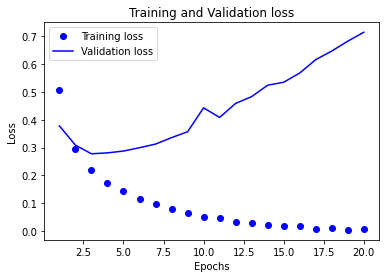

In [17]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

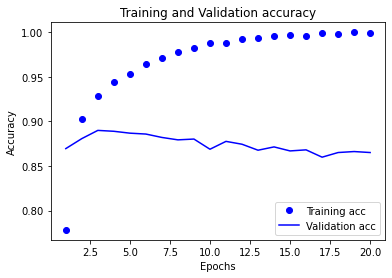

In [20]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

과대 적합된 상태. 다시 처음부터 훈련하기

In [22]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 10ms/step - loss: 0.4446 - accuracy: 0.8272
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2546 - accuracy: 0.9103
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1951 - accuracy: 0.9301
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3037 - accuracy: 0.8809


In [24]:
results

[0.30368101596832275, 0.8808799982070923]

## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [26]:
model.predict(X_test)

782/782 [==============================] - 3s 2ms/step


array([[0.23327662],
       [0.9998728 ],
       [0.9768594 ],
       ...,
       [0.12945642],
       [0.12279436],
       [0.7730995 ]], dtype=float32)

# 3.5 뉴스 기사 분류: 다중분류 문제

In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


## 3.5.2 데이터 준비

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [29]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [30]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3.5.3 모델 구성

In [32]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 3.5.4 훈련 검증

In [33]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_X_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.6744 - accuracy: 0.5511 - val_loss: 1.7233 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.3729 - accuracy: 0.7221 - val_loss: 1.2825 - val_accuracy: 0.7290
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0167 - accuracy: 0.7869 - val_loss: 1.1244 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8082 - accuracy: 0.8271 - val_loss: 1.0280 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6501 - accuracy: 0.8626 - val_loss: 0.9677 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5264 - accuracy: 0.8881 - val_loss: 0.9506 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.4253 - accuracy: 0.9090 - val_loss: 0.9009 - val_accuracy: 0.8260
Epoch 8/20
16

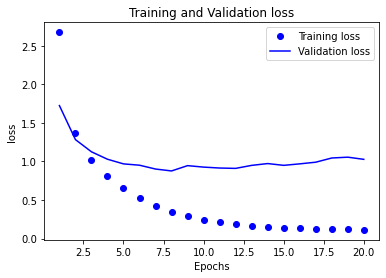

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend();

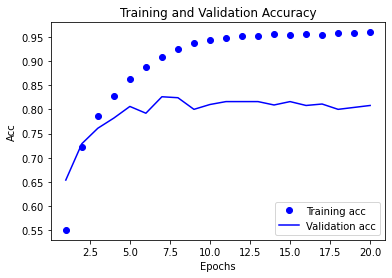

In [36]:
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend();

In [38]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(partial_X_train, partial_y_train,
         epochs=9, batch_size=512, validation_data = (X_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 33ms/step - loss: 2.7416 - accuracy: 0.5244 - val_loss: 1.7575 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.4051 - accuracy: 0.7184 - val_loss: 1.2993 - val_accuracy: 0.7350
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.0163 - accuracy: 0.7905 - val_loss: 1.1149 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 0s 21ms/step - loss: 0.7996 - accuracy: 0.8325 - val_loss: 1.0250 - val_accuracy: 0.7790
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6376 - accuracy: 0.8662 - val_loss: 0.9601 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5141 - accuracy: 0.8945 - val_loss: 0.9838 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4211 - accuracy: 0.9102 - val_loss: 0.9418 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [40]:
results = model.evaluate(X_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0087 - accuracy: 0.7867


In [41]:
results

[1.0087318420410156, 0.7867319583892822]

In [42]:
model.predict(X_test)

71/71 [==============================] - 0s 2ms/step


array([[3.0653714e-04, 1.5575771e-04, 2.7274444e-05, ..., 8.0994214e-05,
        4.1599924e-06, 9.0733993e-06],
       [7.4016993e-06, 2.4559164e-02, 5.0584017e-03, ..., 9.3239034e-03,
        1.0927148e-05, 1.4212455e-04],
       [3.4535641e-04, 7.9789042e-01, 7.7567110e-03, ..., 3.5469236e-03,
        3.0953845e-04, 2.0875174e-03],
       ...,
       [2.6923511e-04, 2.1514215e-04, 4.5944049e-05, ..., 4.8443031e-05,
        1.8337483e-05, 4.5526769e-05],
       [2.8220257e-03, 1.5427218e-01, 2.1613485e-03, ..., 2.6287057e-03,
        1.7893924e-03, 2.0231102e-03],
       [2.6930560e-04, 4.4666794e-01, 3.2200448e-02, ..., 6.3455198e-03,
        2.3191660e-05, 2.8130921e-04]], dtype=float32)

## 3.5.6 레이블과 손실을 다루는 다른 방법

레이블을 원핫인코딩이 아니라 정수텐서(np.array)로 인코딩한다면 손실함수를 바꾸어야함

`categorical_crossentropy`는 레이블이 범주형 인코딩 되어있어야함

`sparse_categorical_crossentropy`를 사용

# 3.6 주택 가격 예측: 회귀 문제

## 3.6.1 보스턴 주택 가격 데이터셋

In [43]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


## 3.6.2 데이터 준비

In [44]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# 머신러닝 작업 과정에서 절대로 테스트데이터에서 계산한 어떤 값도 사용해서는 안됨

## 3.6.3 모델 구성

In [46]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## 3.6.4 K-폴드 검증을 사용한 훈련 검증

In [47]:
import numpy as np

k=4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], 
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)  
    # verbose = 0으로 훈련과정이 출력되지 않음
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [48]:
all_scores

[1.9751291275024414, 2.4847452640533447, 2.6487231254577637, 2.288635492324829]

In [49]:
np.mean(all_scores)

2.3493082523345947

In [53]:
# 최종 모델 훈련
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16)

Epoch 1/80
26/26 [==============================] - 1s 2ms/step - loss: 543.3087 - mae: 21.4448
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 412.2496 - mae: 18.4166
Epoch 3/80
26/26 [==============================] - 0s 1ms/step - loss: 252.3905 - mae: 13.9206
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 118.2957 - mae: 8.7852
Epoch 5/80
26/26 [==============================] - 0s 1ms/step - loss: 57.5143 - mae: 5.7935
Epoch 6/80
26/26 [==============================] - 0s 1ms/step - loss: 37.6353 - mae: 4.5499
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 28.3776 - mae: 3.8126
Epoch 8/80
26/26 [==============================] - 0s 1ms/step - loss: 23.5062 - mae: 3.4247
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 20.8109 - mae: 3.1950
Epoch 10/80
26/26 [==============================] - 0s 1ms/step - loss: 19.3557 - mae: 3.1061
Epoch 11/80
26/26 [==============================] -

In [54]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.2316 - mae: 2.6410


In [55]:
test_mae_score

2.6409966945648193